In [1]:
import warnings
warnings.filterwarnings("ignore")

# LinearRegression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
#使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = datasets.load_diabetes()
# 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0) 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# 打印训练结果
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


# Ridge

In [6]:
regr = linear_model.Ridge()
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept 152.45
Residual sum of squares: 3192.33
Score: 0.36


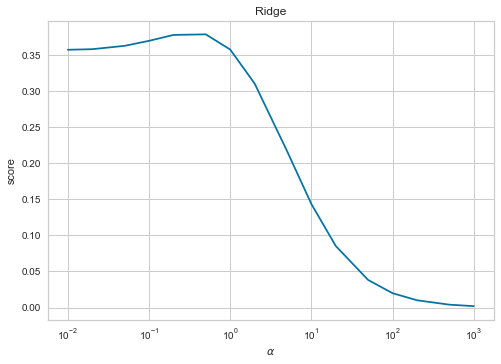

In [7]:
def test_Ridge_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()
# 测试 Ridge 的预测性能随 alpha 参数的影响
test_Ridge_alpha(X_train,X_test,y_train,y_test) # 调用 test_Ridge_alpha

In [12]:
??ManualAlphaSelection

# Lasso

In [3]:
regr = linear_model.Lasso()
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ], intercept 152.52
Residual sum of squares: 3583.42
Score: 0.28


In [4]:
??regr

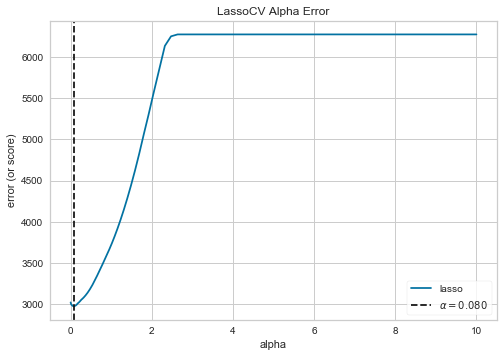

In [5]:
# 选定最佳Alpha,
import numpy as np
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
alphas = np.logspace(-10, 1, 400)
model = LassoCV(alphas=alphas,cv=5)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.poof()

In [38]:
regr = linear_model.Lasso(alpha=0.08)
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[  -0.         -144.73166124  593.07287858  250.23826966 -114.32555702
   -0.         -204.4810939     0.          541.73009256    0.        ], intercept 153.02
Residual sum of squares: 3196.22
Score: 0.36


# ElasticNet

In [18]:
regr = linear_model.ElasticNet()
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept 151.93
Residual sum of squares: 4922.36
Score: 0.01


In [40]:
??regr

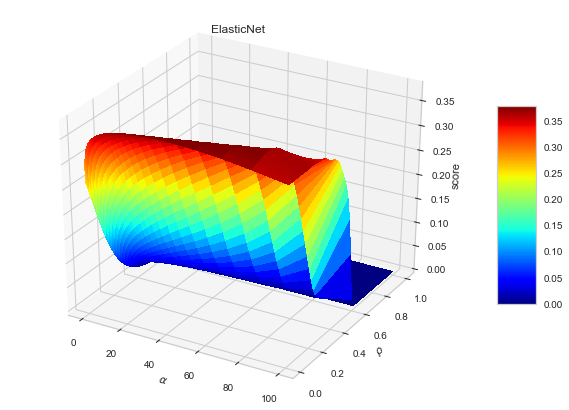

In [43]:
# 测试 ElasticNet 的预测性能随 alpha 和 l1_ratio 的影响
def test_ElasticNet_alpha_rho(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,2)
    rhos=np.linspace(0.01,1)
    scores=[]
    for alpha in alphas:
            for rho in rhos:
                regr = linear_model.ElasticNet(alpha=alpha,l1_ratio=rho)
                regr.fit(X_train, y_train)
                scores.append(regr.score(X_test, y_test))
    ## 绘图
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores=np.array(scores).reshape(alphas.shape)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig=plt.figure()
    ax=Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title("ElasticNet")
    plt.show()
test_ElasticNet_alpha_rho(X_train,X_test,y_train,y_test)

# Logistic

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
iris=datasets.load_iris() # 使用 scikit-learn 自带的 iris 数据集
X_train=iris.data
y_train=iris.target
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train,test_size=0.25,random_state=0,stratify=y_train)
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[[ 0.38705175  1.35839989 -2.12059692 -0.95444452]
 [ 0.23787852 -1.36235758  0.5982662  -1.26506299]
 [-1.50915807 -1.29436243  2.14148142  2.29611791]], intercept [ 0.23950369  1.14559506 -1.0941717 ]
Score: 0.97


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
# 测试 LogisticRegression 的预测性能随 multi_class 参数的影响
regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
regr.fit(X_train, y_train)
print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
print('Score: %.2f' % regr.score(X_test, y_test))

Coefficients:[[-0.38357166  0.86180161 -2.2702519  -0.97432444]
 [ 0.34360497 -0.37864972 -0.0308111  -0.86902727]
 [ 0.03996669 -0.48315189  2.301063    1.84335171]], intercept [  8.76011286   2.49350758 -11.25362044]
Score: 1.00


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


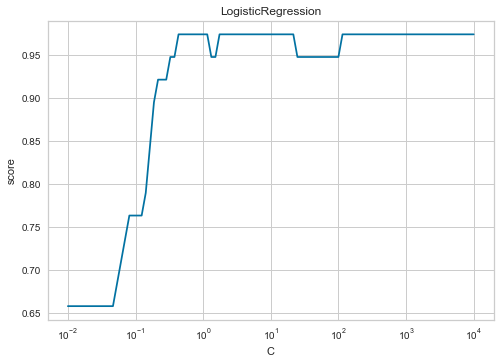

In [56]:
# 测试 LogisticRegression 的预测性能随  C  参数的影响
def test_LogisticRegression_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,4,num=100)
    scores=[]
    for C in Cs:
        regr = linear_model.LogisticRegression(C=C)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,scores)
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LogisticRegression")
    plt.show()
test_LogisticRegression_C(X_train,X_test,y_train,y_test)